In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from spp.convex_sets import Polyhedron, Ellipsoid
from spp.motion_planning import MotionPlanner

In [3]:
safe_sets = [
    Polyhedron.from_vertices(([0, 1], [0, -1], [3, -1], [3, 1])),
    Polyhedron.from_vertices(([4, 0], [5, -2], [3, -2], [2, -1])),
    Polyhedron.from_vertices(([2, 0], [1, 1], [2, 2], [4, 2], [4, 1])),
    Polyhedron.from_vertices(([5, 3], [8, 3], [7, 2], [5, 1])),
    Polyhedron.from_vertices(([7, 0], [8, 0], [9, 1], [8, 2])),
    Polyhedron.from_vertices(([7, 1], [9, 1], [9, 3], [7, 3])),
    Ellipsoid((4.5, 2), ([1, 0], [0, 1])),
    Ellipsoid((8, 0), ([.25, 0], [0, 1])),
    Ellipsoid((6, 0), ([1, 0], [0, .25])),
    Ellipsoid((5, -1), ([.5, 0], [0, 1])),
]
qs = np.array([1, 0])
qt = np.array([8, 2])

def plot_safe_sets():
    for S in safe_sets:
        S.plot()
    plt.scatter(*qs, zorder=4, c='k')
    plt.scatter(*qt, zorder=4, c='k')

In [16]:
degree = 2
planner = MotionPlanner(safe_sets, qs, qt, degree, relaxation=0)
control_points = planner.solve()

[((0, 2), 1.0), ((2, 0), 0.0), ((1, 6), 0.0), ((6, 1), 0.0), ((1, 7), 0.0), ((7, 1), 1.0), ((2, 3), 0.0), ((3, 2), 0.0), ((2, 4), 1.0), ((4, 2), 0.0), ((3, 11), 0.0), ((11, 3), 0.0), ((4, 8), 1.0), ((8, 4), 0.0), ((5, 7), 1.0), ((7, 5), 0.0), ((5, 8), 0.0), ((8, 5), 1.0), ((5, 10), 0.0), ((10, 5), 0.0), ((6, 7), 0.0), ((7, 6), 0.0), ((6, 9), 0.0), ((9, 6), 0.0), ((6, 10), 0.0), ((10, 6), 0.0), ((7, 9), 0.0), ((9, 7), 0.0), ((8, 10), 0.0), ((10, 8), 0.0), ((9, 10), 0.0), ((10, 9), 0.0), ((10, 11), 0.0), ((11, 10), 0.0)]
[(0, 2), (7, 1), (2, 4), (4, 8), (5, 7), (8, 5)]
(0, 2)
(2, 4)
(4, 8)
(8, 5)


<IPython.core.display.Javascript object>


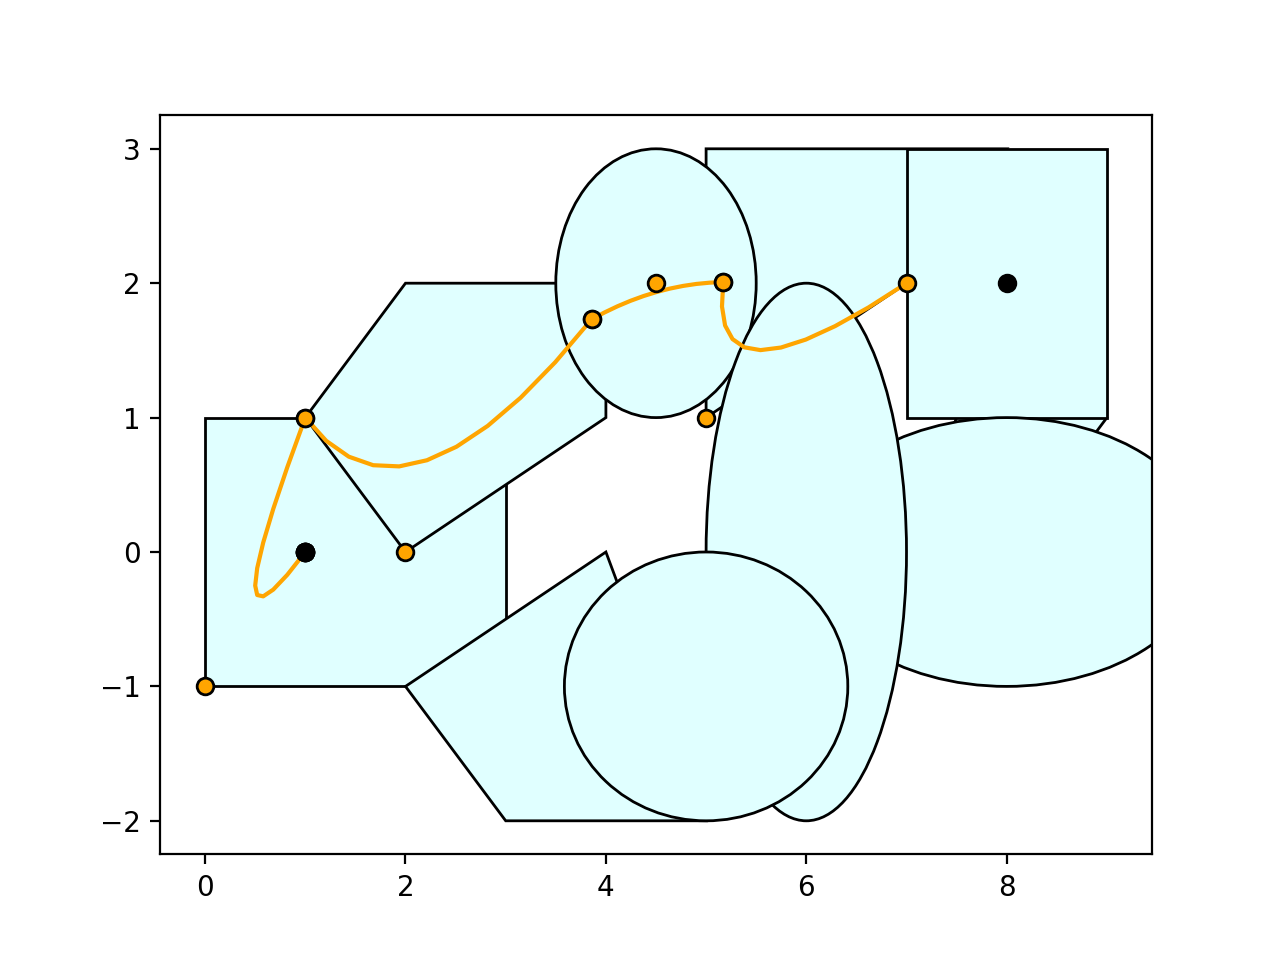

In [5]:
import bezier

def plot_curve(curve, **kwargs):
    time = np.linspace(0, 1, 11)
    points = np.array([curve.evaluate(t).flatten() for t in time])
    plt.plot(*points.T, **kwargs)

for points_in_set in control_points:
    curve = bezier.Curve(points_in_set.T, degree=degree)
    plot_curve(curve, c='orange')

plot_safe_sets()
for points_in_set in control_points:
    plt.scatter(*points_in_set.T, zorder=3, fc='orange', ec='k')

In [6]:
control_points.shape

(5, 3, 2)

In [7]:
control_points[1].T

array([[ 1.,  0.,  1.],
       [ 0., -1.,  1.]])